# TITANIC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic.csv')

In [3]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
train.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


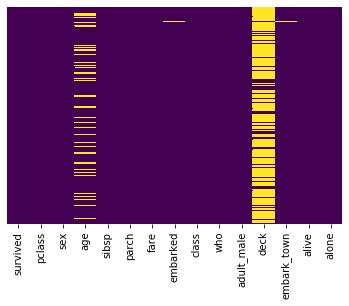

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

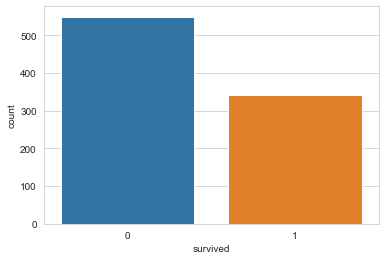

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=train)

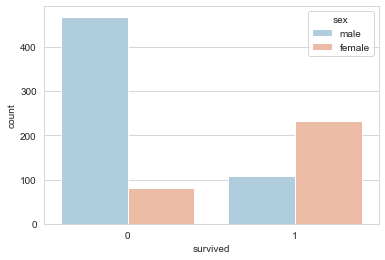

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=train,palette='RdBu_r')

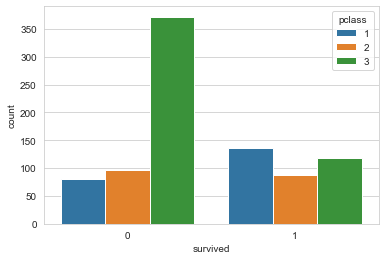

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=train)

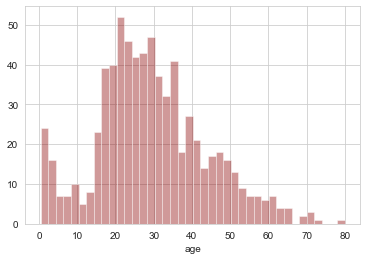

In [9]:
sns.distplot(train['age'].dropna(),kde=False,color='darkred',bins=40)

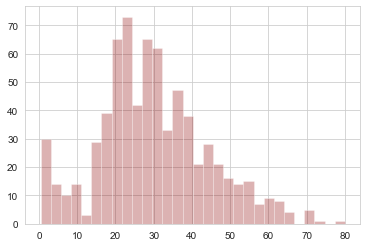

In [10]:
train['age'].hist(bins=30,color='darkred',alpha=0.3)

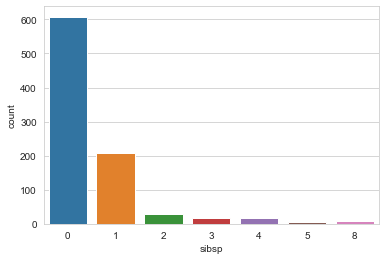

In [11]:
sns.countplot(x='sibsp',data=train)

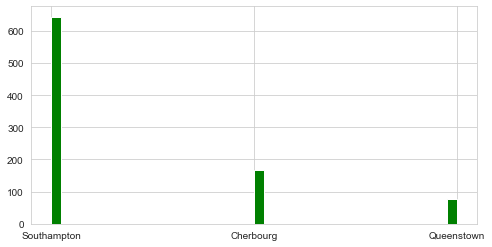

In [13]:
train['embark_town'].hist(color='green',bins=40,figsize=(8,4))

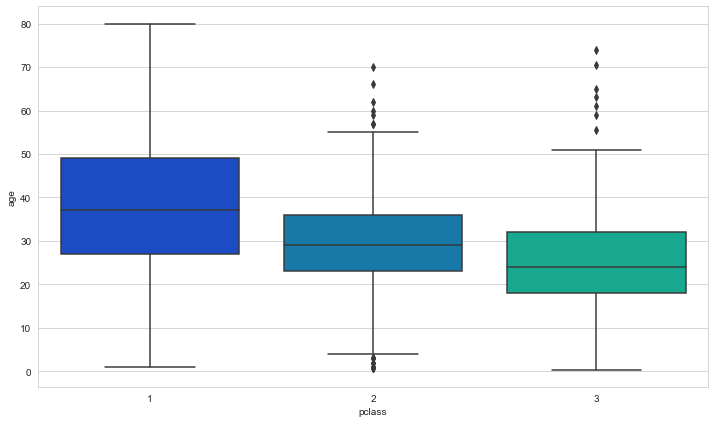

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=train,palette='winter')

In [16]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        
        elif pclass == 2:
            return 29
        
        else:
            return 24
    else:
         return age
        

In [17]:
train['age'] = train[['age','pclass']].apply(impute_age,axis=1)

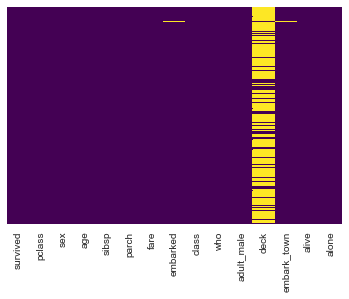

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train.drop('deck',axis=1,inplace=True)

In [23]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 78.4+ KB


In [25]:
pd.get_dummies(train['alone'],drop_first=True).head()

,True
0,0
1,0
2,1
3,0
4,1


In [26]:
sex = pd.get_dummies(train['sex'],drop_first=True)
embark = pd.get_dummies(train['embarked'],drop_first=True)

In [36]:
train.drop(['who'],axis=1,inplace=True)

In [37]:
train.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,22.0,1,0,7.2500,True,Southampton,False
1,1,1,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,26.0,0,0,7.9250,False,Southampton,True
3,1,1,35.0,1,0,53.1000,False,Southampton,False
4,0,3,35.0,0,0,8.0500,True,Southampton,True


In [41]:
train= pd.concat([train,sex,embark],axis=1)

In [42]:
train.drop('survived',axis=1).head()

,pclass,age,sibsp,parch,fare,adult_male,embark_town,alone,male,Q,S,male,Q,S
0,3,22.0,1,0,7.2500,True,Southampton,False,1,0,1,1,0,1
1,1,38.0,1,0,71.2833,False,Cherbourg,False,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,False,Southampton,True,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,False,Southampton,False,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,True,Southampton,True,1,0,1,1,0,1
